In [18]:
import geopandas as gpd
import contextily as ctx


In [32]:
rest_query_params = "query?where=1%3D1&outFields=*&returnGeometry=true&returnDistinctValues=false&f=geojson"
bia_lar_feature_layer = 'https://biamaps.doi.gov/server/rest/services/DivLTR/BIA_AIAN_National_LAR/FeatureServer/0'
bia_tsa_feature_layer = 'https://biamaps.doi.gov/server/rest/services/DivLTR/BIA_AIAN_Tribal_Statistical_Areas/FeatureServer/0'
bia_western_trust_lands_feature_layer = 'https://biamaps.doi.gov/server/rest/services/Hosted/Western_Region_Tribal_Trust_Lands/FeatureServer/4'

bia_lar_supplemental_url = 'https://biamaps.doi.gov/server/rest/services/DivLTR/BIA_AIAN_LAR_Supplemental/FeatureServer/0'

In [15]:

gdf_tsa = gpd.read_file(f'{bia_tsa_feature_layer}/{rest_query_params}')


In [16]:
gdf_tsa.head()

,OBJECTID,TSAID,LARNAME,GISACRES,GlobalID,geometry
0,1,TSA0332,Cherokee TSA,4.444937e+06,{F3B724D0-C700-4CD5-90EF-A448D57ABD4C},"POLYGON ((-94.89713 36.88084, -94.89721 36.880..."
1,2,TSA0333,Cheyenne and Arapaho TSA,4.302316e+06,{1C70598E-7B3D-4849-9986-854289D4A8A0},"POLYGON ((-97.95872 35.35597, -97.95872 35.357..."
2,3,TSA0334,Chickasaw TSA,4.725565e+06,{DAF2ACB8-E03A-4CEF-86B6-B2B76B321E5B},"POLYGON ((-97.25653 34.94939, -97.25663 34.949..."
3,4,TSA0335,Choctaw TSA,6.964584e+06,{8C16F898-CB26-47BA-AB05-38281017D786},"POLYGON ((-94.43176 35.39623, -94.43309 35.394..."
4,5,TSA0336,Citizen Potawatomi TSA,5.765415e+05,{75CC969D-372F-4443-8A06-49598C7BEF07},"POLYGON ((-97.24721 35.54372, -97.24726 35.543..."


In [26]:
cherokee_tsa = gdf_tsa[gdf_tsa['LARNAME'].str.startswith('Cherokee')].to_crs(epsg=3857)

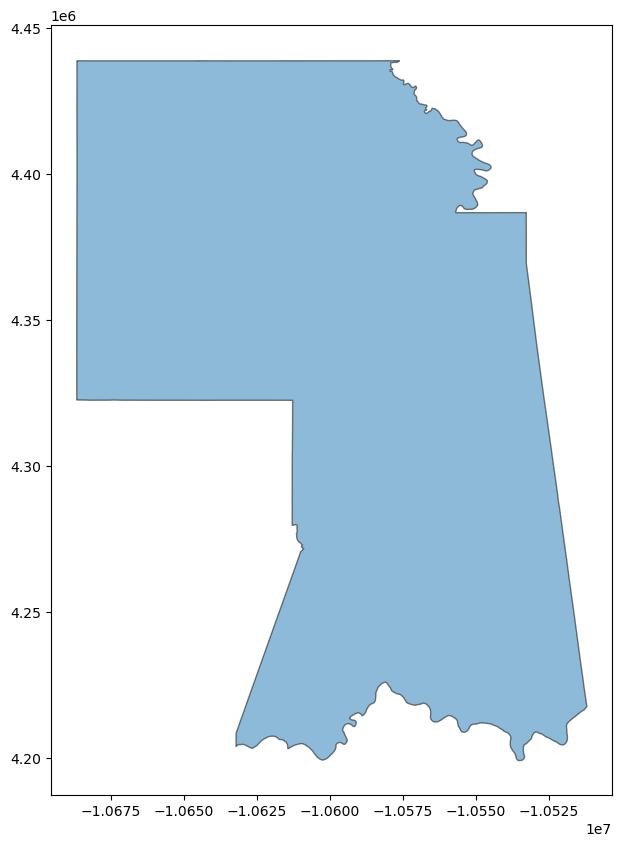

In [27]:
ax = cherokee_tsa.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")

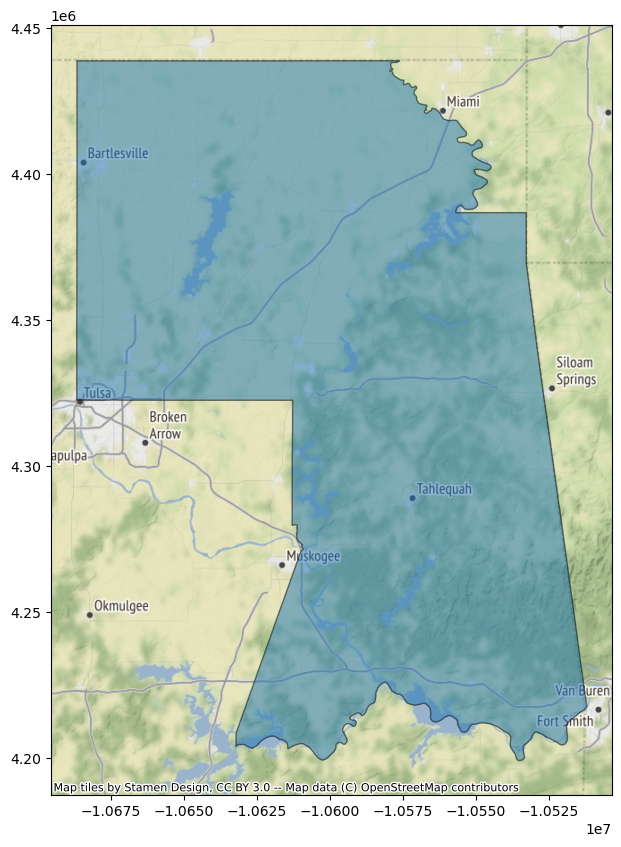

In [29]:
ax = cherokee_tsa.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
ctx.add_basemap(ax)

In [33]:
gdf_lar_supplemental = gpd.read_file(f'{bia_lar_supplemental_url}/{rest_query_params}')

In [36]:
gdf_lar_supplemental_mod.head()

,OBJECTID,GISACRES,SOURCE,LANDAREA,GlobalID,REGION,AGENCY,geometry
0,1,551287.834360,LTM,Spirit Lake,{78C96CCB-655A-4C6E-94CC-CF188296FB91},Great Plains,Fort Totten,"POLYGON ((-11041872.664 6116391.508, -11041841..."
1,2,14028.717235,GDSC,Fallon,{9719631E-1C01-4D53-8D49-51B20D606FFC},Western,Western Nevada,"MULTIPOLYGON (((-13201816.706 4794203.961, -13..."
2,3,347.642328,CENSUS2000,Fallon Colony,{87D8CB83-889A-4940-84DC-FEC1F01EBEDB},Western,Western Nevada,"MULTIPOLYGON (((-13199714.835 4797420.228, -13..."
3,4,73321.957307,GDSC,Eastern Cherokee,{125ED7C7-B941-492A-AEAB-7F6DC9D75C32},Eastern,Unknown,"MULTIPOLYGON (((-9265950.280 4235522.691, -926..."
4,5,116699.699134,TIGER95,Navajo (Canoncito),{033F2833-13A8-4FDE-926D-D6A0B86D5E04},Navajo,Navajo,"POLYGON ((-11909157.245 4171784.655, -11909166..."


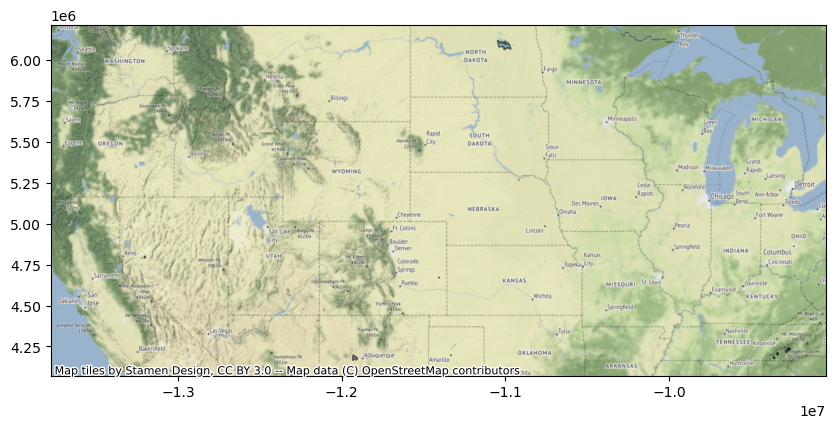

In [35]:
gdf_lar_supplemental_mod = gdf_lar_supplemental.to_crs(epsg=3857)
ax_lar_supplemental = gdf_lar_supplemental_mod.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
ctx.add_basemap(ax_lar_supplemental)